# Chapter 3 2項分布，検定，信頼区間
## 3.1 2項分布

${}_{10}\mathrm{C}_3$

In [1]:
factorial(10) / (factorial(3) * factorial(7))

[1] 120

In [2]:
choose(10, 3)

[1] 120

In [3]:
choose(10, 3) * 0.4^3 * 0.6^7

[1] 0.2149908

In [4]:
dbinom(3, 10, 0.4)

[1] 0.2149908

In [5]:
dbinom(0:10, 10, 0.5)

[1] 0.0009765625 0.0097656250 0.0439453125 0.1171875000 0.2050781250
 [6] 0.2460937500 0.2050781250 0.1171875000 0.0439453125 0.0097656250
[11] 0.0009765625

In [6]:
library(ggplot2)

In [7]:
library(pipeR)

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4)

In [19]:
library(Cairo)

png 
  2

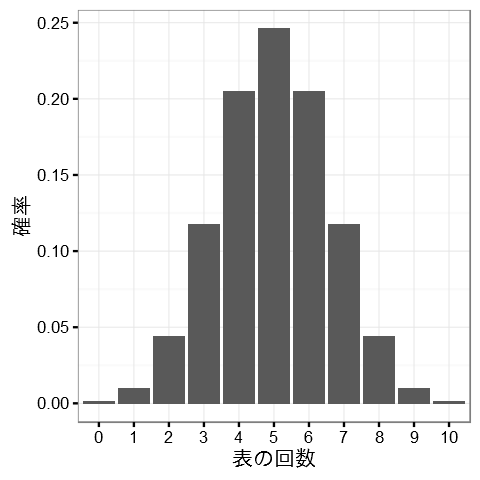

In [20]:
Cairo(type = "raster")
data.frame(x = c(0:10), y = dbinom(0:10, 10, 0.5)) %>>% 
    ggplot(aes(x = as.factor(x), y = y)) + 
        geom_bar(stat="identity") + 
        theme_bw() + 
        xlab("表の回数") + ylab("確率") + 
        theme(axis.title = element_text("IPAexGothic"))
dev.off()

## 3.2 統計的仮説検定の考え方

In [21]:
binom.test(2, 10, 0.5)


	Exact binomial test

data:  2 and 10
number of successes = 2, number of trials = 10, p-value = 0.1094
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.02521073 0.55609546
sample estimates:
probability of success 
                   0.2 


In [22]:
binom.test(1, 10, 0.5)


	Exact binomial test

data:  1 and 10
number of successes = 1, number of trials = 10, p-value = 0.02148
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.002528579 0.445016117
sample estimates:
probability of success 
                   0.1 


## 3.3 統計的仮説検定に関する議論

In [23]:
binom.test(20, 100, 0.5)


	Exact binomial test

data:  20 and 100
number of successes = 20, number of trials = 100, p-value = 1.116e-09
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1266556 0.2918427
sample estimates:
probability of success 
                   0.2 


## 3.4 多重検定

# 3.5 信頼区間

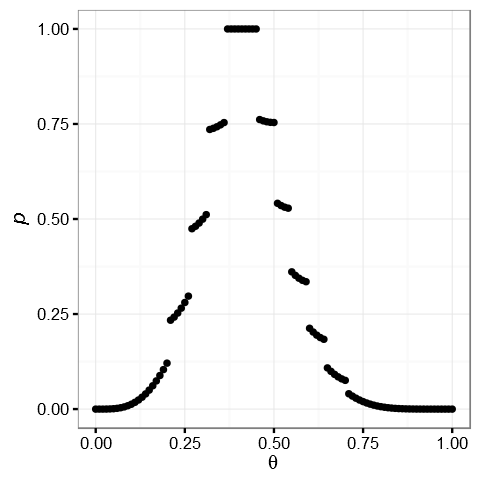

In [30]:
x <- c(0:100) / 100
y <- sapply(x, function(t){
    binom.test(4, 10, t)$p.value
})
data.frame(x = x, y = y) %>>% 
    ggplot(aes(x = x, y = y)) + 
    geom_point(shape = 16) + 
    theme_bw() + 
    xlab(expression(italic(theta))) + 
    ylab(expression(italic("p")))

信頼区間: 0.1500 $\leq$ $\theta$ $\leq$ 0.7091

In [31]:
uniroot(function(t){
    binom.test(4, 10, t)$p.value - 0.05
}, c(0.1, 0.2))

$root
[1] 0.1500038

$f.root
[1] -2.614929e-05

$iter
[1] 5

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

In [32]:
uniroot(function(t){
    binom.test(4, 10, t)$p.value - 0.05
}, c(0.6, 0.8))

$root
[1] 0.709139

$f.root
[1] -0.009038571

$iter
[1] 13

$init.it
[1] NA

$estim.prec
[1] 7.795256e-05

* 片側$p$値

In [33]:
binom.test(4, 10)


	Exact binomial test

data:  4 and 10
number of successes = 4, number of trials = 10, p-value = 0.7539
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1215523 0.7376219
sample estimates:
probability of success 
                   0.4 


* 両側$p$値

In [34]:
library(exactci)

Warning message:
: package 'exactci' was built under R version 3.3.1Loading required package: ssanv
Warning message:
: package 'ssanv' was built under R version 3.3.1

In [35]:
binom.exact(4, 10, tsmethod = "minlike")


	Exact two-sided binomial test (sum of minimum likelihood method)

data:  4 and 10
number of successes = 4, number of trials = 10, p-value = 0.7539
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1500 0.7091
sample estimates:
probability of success 
                   0.4 
